In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['text.usetex'] = True

In [ ]:
def KmeansCluster(x, k):
    kmeans  = KMeans(n_clusters=k) #, random_state=42)
    id = kmeans.fit_predict(x)
    score = silhouette_score(x, id)
    return id, score

def dataGenerator(cells, genes, vary='mu', mu0=5, sd = 1, delta=.1):
    x = np.zeros((genes, cells))
    if vary == 'mu':
        mu1, sd1 = mu0 - delta, sd
        mu2, sd2 = mu0, sd
        mu3, sd3 = mu0 + delta,sd
    elif vary == 'sd':
        mu1, sd1 = mu0-2, max(0.1, sd - delta)
        mu2, sd2 = mu0, sd
        mu3, sd3 = mu0+2, sd + delta
        
    x[:80,:] = np.random.normal(mu2, sd2, (80, 500))
    x[80:, :250] = np.random.normal(mu1, sd1, (20, 250))
    x[80:, 250:] = np.random.normal(mu3, sd3, (20, 250))
    
    return x

## Varying $\mu$

Text(0.5, 0, '$\\Delta \\mu$')

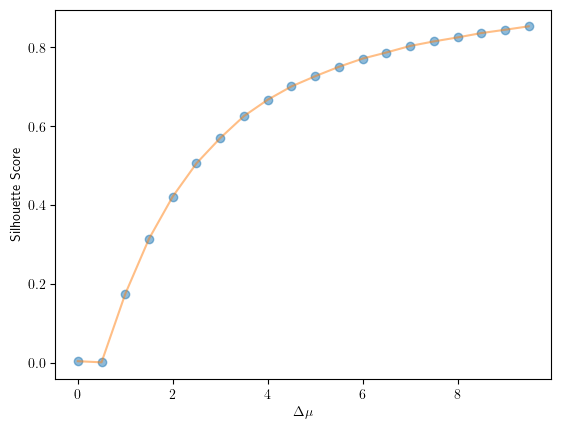

In [20]:
score_mu = []
deltamu = np.arange(0, 10, .5)
for deltamuIdx in deltamu: 
    data = dataGenerator(500, 100, delta=deltamuIdx, vary='mu', sd=1)
    id, score = KmeansCluster(data, 2)
    score_mu.append(score)
    

plt.plot(deltamu, score_mu, 'o', alpha=.5)
plt.plot(deltamu, score_mu, '-', alpha=.5)
plt.ylabel('Silhouette Score')
plt.xlabel('$\Delta \mu$')

## Varying $\sigma$

Text(0.5, 0, '$\\Delta \\sigma$')

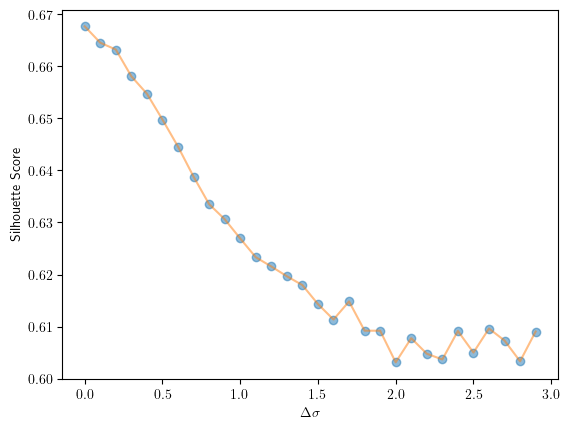

In [ ]:
score_sd = []
deltasd = np.arange(0, 3, .1)
for deltasdIdsx in deltasd: 
    data = dataGenerator(500, 100, delta=deltasdIdsx, vary='sd', sd=.5, mu0=5)
    id, score = KmeansCluster(data, 2)
    score_sd.append(score)
    

plt.plot(deltasd, score_sd, 'o', alpha=.5)
plt.plot(deltasd, score_sd, '-', alpha=.5)
plt.ylabel('Silhouette Score')
plt.xlabel('$\Delta \sigma$')